In [2]:
import netCDF4
import numpy as np
import datetime

In [3]:
f = netCDF4.Dataset('data/20180624_leipzig_categorize.nc')
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    location: Leipzig
    title: Cloud categorization products from Leipzig, 2018-06-24
    day: 24
    month: 6
    year: 2018
    history: 27 Jun 2018 07:55:46 - Generated from level 1 data by Ewan O'Connor <e.j.oconnor@reading.ac.uk>
Radar history: Original data has been averaged to 30 seconds.
Lidar history: File converted with convert_pollyxt.m
Model history: 27-Jun-2018 07:52:19: Created from GDAS1 profiles produced with the profile binary in the HYSPLIT offline package using convert_gdas12pro.sh.
Gauge history: created from parsivel2-data by Patric Seifert, TROPOS
Microwave radiometer history: Created from HATPRO data with MWR-PRO V04 Retrieval with offset correction
    source: 35.5 GHz Cloud radar MIRA
Radar type: Monostatic, pulsed, magnetron
Peak Power 30 kW
Antenna Type: Cassegrain 1.2 m
Antenna Beam Width: 0.5 deg;
PollyXT;
https://www.ready.noaa.gov/gda

In [4]:
print(f.variables['time'])
time = f.variables['time']
height = f.variables['height']

rainrate = f.variables['rainrate']

dt = datetime.datetime(f.year, f.month, f.day)
dt_list = [dt + datetime.timedelta(seconds=h*3600) for h in time]

print(dt_list[:10])

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    axis: T
    units: hours since 2018-06-24 00:00:00 +0:00
    long_name: Time UTC
    standard_name: time
unlimited dimensions: 
current shape = (2879,)
filling on, default _FillValue of 9.969209968386869e+36 used

[datetime.datetime(2018, 6, 24, 0, 0, 45, 1), datetime.datetime(2018, 6, 24, 0, 1, 15, 2), datetime.datetime(2018, 6, 24, 0, 1, 45), datetime.datetime(2018, 6, 24, 0, 2, 15, 5), datetime.datetime(2018, 6, 24, 0, 2, 45, 4), datetime.datetime(2018, 6, 24, 0, 3, 15, 2), datetime.datetime(2018, 6, 24, 0, 3, 45), datetime.datetime(2018, 6, 24, 0, 4, 14, 999998), datetime.datetime(2018, 6, 24, 0, 4, 44, 999996), datetime.datetime(2018, 6, 24, 0, 5, 14, 999995)]


In [5]:
%matplotlib inline

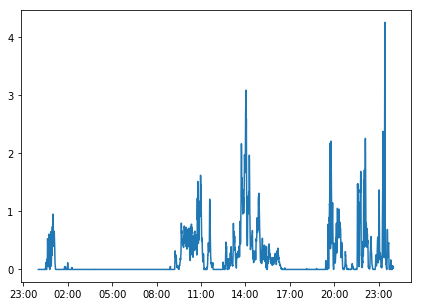

In [6]:
# plot with the rainrate

import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots(1, figsize=(7,5))
ax.plot(dt_list, rainrate)

# some more visual candy
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M'))

-999.0


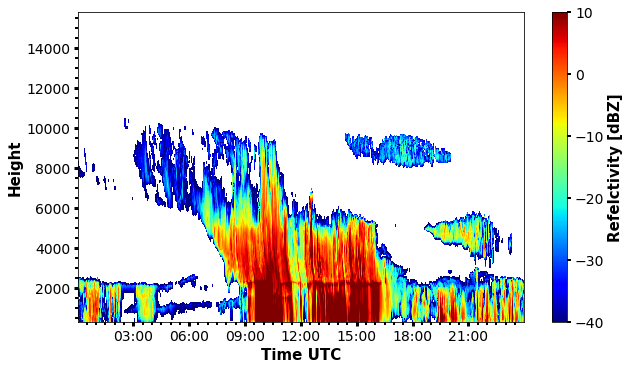

In [9]:
# reflectivity plot

Z = f.variables['Z']
print(np.min(Z))

Z = np.ma.masked_less(Z, -99)

fig, ax = plt.subplots(1, figsize=(10, 5.7))
pcmesh = ax.pcolormesh(dt_list,
                       height,
                       np.transpose(Z),
                       cmap='jet', vmin=-40, vmax=10)
cbar = fig.colorbar(pcmesh)
#ax.set_xlim([dt_list[0], dt_list[-1]])
#ax.set_ylim([height_list[0], height_list[-1]])

ax.set_xlabel("Time UTC", fontweight='semibold', fontsize=15)
ax.set_ylabel("Height", fontweight='semibold', fontsize=15)
cbar.ax.set_ylabel("Refelctivity [dBZ]", fontweight='semibold', fontsize=15)
# [m s$\mathregular{^{-1}}$]
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M'))
#ax.xaxis.set_major_locator(matplotlib.dates.MinuteLocator(byminute=[0,30]))
#ax.xaxis.set_minor_locator(matplotlib.dates.MinuteLocator(byminute=range(0,61,10)))
ax.xaxis.set_major_locator(matplotlib.dates.HourLocator(interval=3))
ax.xaxis.set_minor_locator(matplotlib.dates.MinuteLocator(byminute=[0,30]))
ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(500))


ax.tick_params(axis='both', which='major', labelsize=14, 
               width=3, length=4)
ax.tick_params(axis='both', which='minor', width=2, length=3)
cbar.ax.tick_params(axis='both', which='major', labelsize=14,
                    width=2, length=4)

# savename = dt_list[0].strftime("%Y%m%d_%H%M") \
#            + "_vel_corr.png"
#fig.savefig(savename, dpi=250)

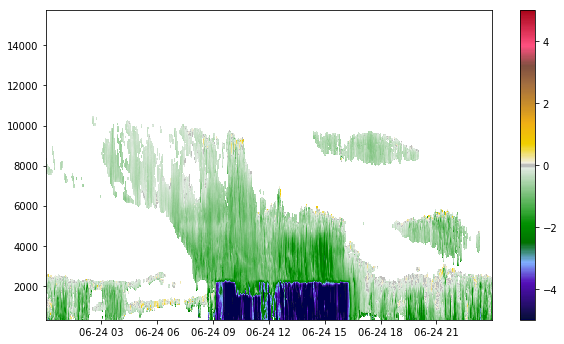

In [21]:
# velocity plot with custom colorplot

import Colormaps
# similar for velocity
v = f.variables['v']
v = np.ma.masked_less(v, -99)

fig, ax = plt.subplots(1, figsize=(10, 5.7))
pcmesh = ax.pcolormesh(dt_list,
                       height,
                       np.transpose(v),
                       cmap=Colormaps.carbonne_map, vmin=-5, vmax=5)
cbar = fig.colorbar(pcmesh)

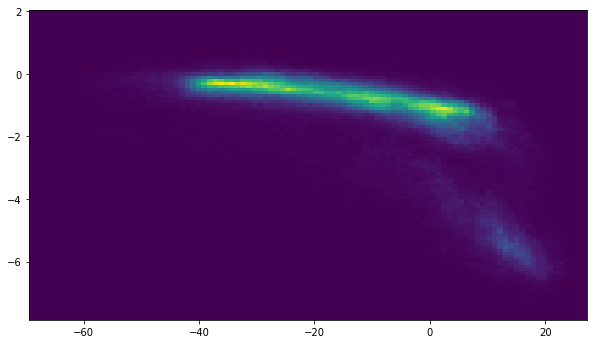

In [24]:
# 2d histogram

mask = np.ma.mask_or(Z.mask, v.mask)
Z.mask = mask
v.mask = mask
H, xedges, yedges = np.histogram2d(Z.ravel().compressed(), v.ravel().compressed(),
                                   bins=[100,100])

fig, ax = plt.subplots(1, figsize=(10, 5.7))
pcmesh = ax.pcolormesh(xedges, yedges,
                       np.transpose(H),
                       cmap='viridis')